In [29]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

In [23]:

# 設定路徑
train_path = r"C:\Users\py\Desktop\新增資料夾\titanic\train.csv"
test_path = r"C:\Users\py\Desktop\新增資料夾\titanic\test.csv"

# 讀取 Titanic 資料集
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 檢查資料
print("Train Data:")
print(train_data.info())
print("\nTest Data:")
print(test_data.info())


Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

In [24]:
# 使用 concat 方法將 train_data 和 test_data 合併
total_data = pd.concat([train_data, test_data], ignore_index=True)

# 查看合併後的資料資訊
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [25]:
# 顯示 train_data 中 PassengerId 欄位的前 15 筆資料
print(train_data['PassengerId'].head(15))

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
Name: PassengerId, dtype: int64


In [26]:
total_data['Survived'].unique()

array([ 0.,  1., nan])

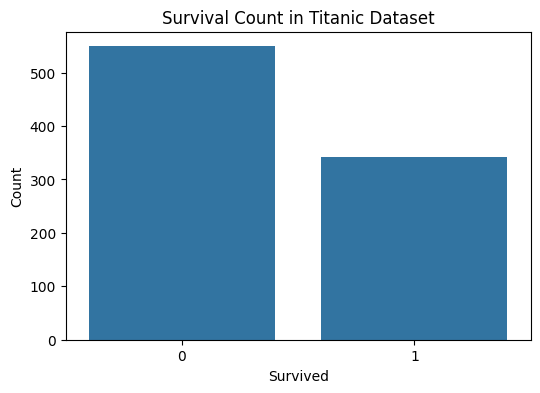

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Survived')
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count in Titanic Dataset")
plt.show()

In [30]:
total_data['Pclass'].unique()

array([3, 1, 2])

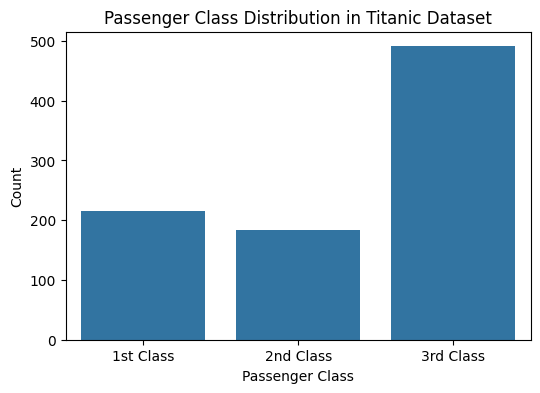

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Pclass')
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Passenger Class Distribution in Titanic Dataset")
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

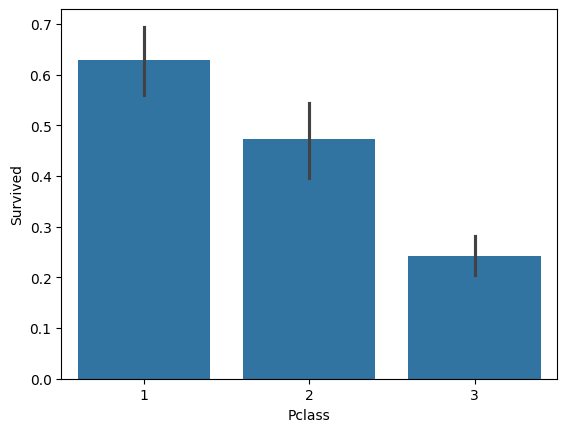

In [33]:
sns.barplot(x='Pclass',y="Survived",data=train_data)

In [34]:
total_data['Sex'].unique()

array(['male', 'female'], dtype=object)

<Axes: xlabel='count', ylabel='Sex'>

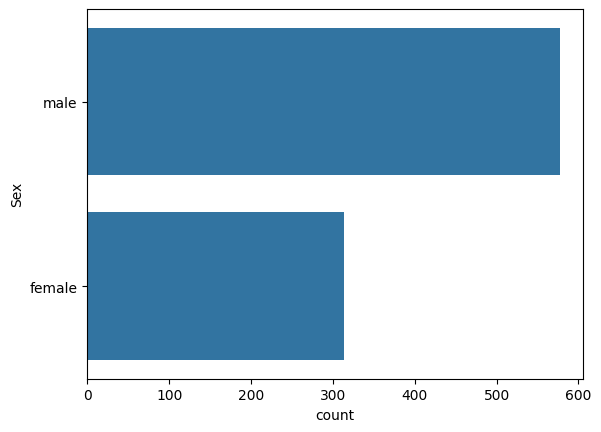

In [35]:
sns.countplot(train_data['Sex'])

In [36]:
labelencoder=LabelEncoder()
total_data['Sex']=labelencoder.fit_transform(total_data['Sex'])

In [37]:
total_data['Sex'].unique()

array([1, 0])

In [38]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [39]:
train_data['Age_qcut']=pd.qcut(train_data['Age'],8)

In [40]:
train_data['Age_qcut'].unique()

[(20.125, 24.0], (32.312, 38.0], (24.0, 28.0], NaN, (47.0, 80.0], (0.419, 16.0], (16.0, 20.125], (38.0, 47.0], (28.0, 32.312]]
Categories (8, interval[float64, right]): [(0.419, 16.0] < (16.0, 20.125] < (20.125, 24.0] < (24.0, 28.0] < (28.0, 32.312] < (32.312, 38.0] < (38.0, 47.0] < (47.0, 80.0]]

<Axes: xlabel='Age_qcut', ylabel='Survived'>

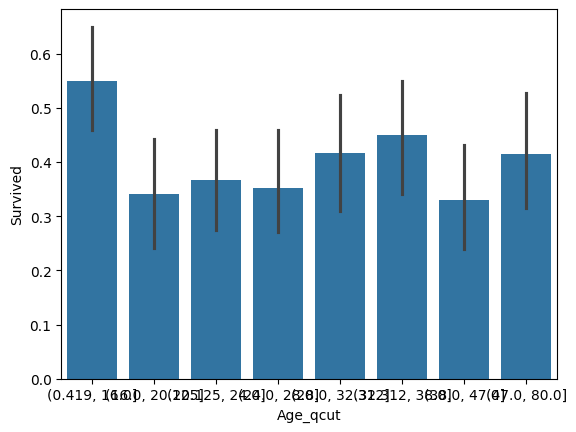

In [41]:
sns.barplot(x=train_data['Age_qcut'],y=train_data['Survived'])

<Axes: xlabel='Age', ylabel='Count'>

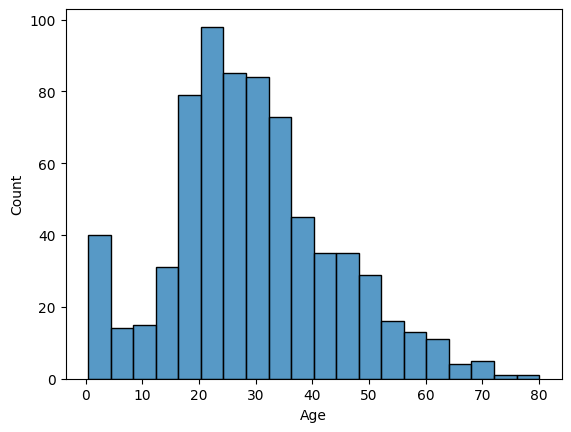

In [42]:
sns.histplot(train_data['Age'])

In [43]:
total_data.loc[total_data['Age']<=16,'Age']=1

In [44]:
total_data.loc[total_data['Age']!=1,'Age']=2

In [45]:
total_data['Age'].unique()

array([2., 1.])